In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np
import plotly.express as px
import datetime

In [2]:
data = pd.read_csv('DelqncData102219.csv')
data.dtypes

credit_score            int64
first_payment_year      int64
first_payment_mnth      int64
msa_code              float64
mi_percent              int64
unit_cnt                int64
occupancy_status       object
orig_cltv               int64
orig_debt_to_inc        int64
orig_upb                int64
orig_ltv                int64
orig_int_rate           int64
property_st            object
property_type          object
ln_seq_number          object
ln_purpose             object
orig_ln_term            int64
borrower_cnt            int64
mth_reprt_prd_year      int64
mth_reprt_prd_mth       int64
curr_actl_upb           int64
curr_ln_delq_stas     float64
ln_age                  int64
remng_mth               int64
curr_int_rt           float64
curr_defrd_upb          int64
eltv                  float64
dtype: object

In [3]:
data.head()

,credit_score,first_payment_year,first_payment_mnth,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,...,borrower_cnt,mth_reprt_prd_year,mth_reprt_prd_mth,curr_actl_upb,curr_ln_delq_stas,ln_age,remng_mth,curr_int_rt,curr_defrd_upb,eltv
0,649,2017,6,40140.0,0,1,P,49,45,173000,...,1,2018,2,171010,4.0,9,351,4.75,0,44.0
1,649,2017,6,40140.0,0,1,P,49,45,173000,...,1,2018,1,172124,3.0,8,352,4.75,0,45.0
2,649,2017,6,40140.0,0,1,P,49,45,173000,...,1,2017,12,172124,2.0,7,353,4.75,0,46.0
3,649,2017,6,40140.0,0,1,P,49,45,173000,...,1,2017,11,172000,2.0,6,354,4.75,0,47.0
4,694,2017,7,37340.0,30,1,P,93,32,367000,...,1,2017,12,366000,3.0,6,354,4.25,0,NaN


In [4]:
data.describe(include ='all')

,credit_score,first_payment_year,first_payment_mnth,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,...,borrower_cnt,mth_reprt_prd_year,mth_reprt_prd_mth,curr_actl_upb,curr_ln_delq_stas,ln_age,remng_mth,curr_int_rt,curr_defrd_upb,eltv
count,10000.000000,10000.0,10000.000000,9417.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,1.000000e+04,...,10000.000000,10000.000000,10000.00000,1.000000e+04,9993.000000,10000.000000,10000.000000,10000.000000,10000.000000,2267.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,P,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,9179,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,705.886900,2017.0,6.986100,31430.716364,10.997300,1.028500,NaN,80.045800,38.928300,2.460666e+05,...,1.343800,2017.787400,5.03770,2.416229e+05,3.247373,8.486400,334.112900,4.498139,13.117400,73.754742
std,45.688678,0.0,0.769003,9375.289177,13.626352,0.251185,NaN,14.631928,11.927883,1.181803e+05,...,0.474999,0.409167,3.69733,1.199550e+05,1.431114,2.270491,59.399454,0.425554,321.901853,15.975373
min,603.000000,2017.0,5.000000,10420.000000,0.000000,1.000000,NaN,9.000000,3.000000,2.800000e+04,...,1.000000,2017.000000,1.00000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,673.000000,2017.0,6.000000,24860.000000,0.000000,1.000000,NaN,75.000000,35.000000,1.500000e+05,...,1.000000,2018.000000,2.00000,1.454025e+05,2.000000,7.000000,349.000000,4.250000,0.000000,67.000000
50%,703.000000,2017.0,7.000000,33124.000000,0.000000,1.000000,NaN,80.000000,41.000000,2.330000e+05,...,1.000000,2018.000000,4.00000,2.301840e+05,3.000000,8.000000,352.000000,4.500000,0.000000,76.000000
75%,738.000000,2017.0,8.000000,36740.000000,30.000000,1.000000,NaN,95.000000,44.000000,3.370000e+05,...,2.000000,2018.000000,6.00000,3.345078e+05,4.000000,10.000000,354.000000,4.750000,0.000000,86.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000007DFBB00>,
      dtype=object)

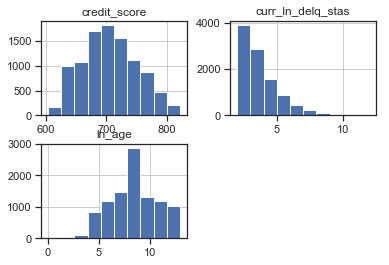

In [5]:
data.hist(column =["ln_age","curr_ln_delq_stas","credit_score"])

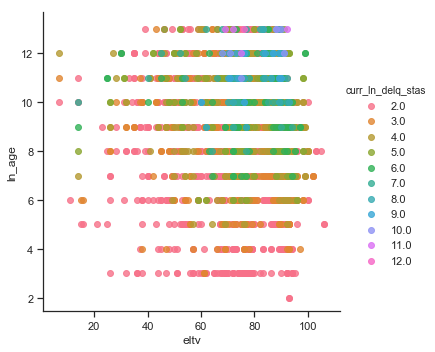

In [7]:
sns.lmplot(x ="eltv", y= "ln_age", data =data, fit_reg=False, hue ="curr_ln_delq_stas")

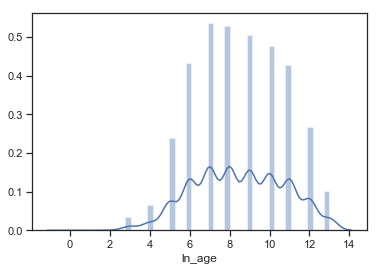

In [10]:
sns.distplot(data["ln_age"])

In [11]:
data.corr()

,credit_score,first_payment_year,first_payment_mnth,msa_code,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,...,borrower_cnt,mth_reprt_prd_year,mth_reprt_prd_mth,curr_actl_upb,curr_ln_delq_stas,ln_age,remng_mth,curr_int_rt,curr_defrd_upb,eltv
credit_score,1.000000,NaN,-0.024086,0.070857,0.070114,0.045762,0.129176,0.038321,0.158507,0.119773,...,-0.107199,-0.018052,0.003980,0.156283,0.014834,-0.021820,0.089546,-0.310674,0.019486,0.127678
first_payment_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_payment_mnth,-0.024086,NaN,1.000000,0.018663,0.013272,0.005675,-0.006947,0.005376,0.059305,-0.008958,...,0.036356,0.037648,-0.023594,0.065736,0.001059,-0.276623,0.006802,-0.098924,-0.000498,-0.073743
msa_code,0.070857,NaN,0.018663,1.000000,0.035450,0.044618,0.038745,0.005200,0.092134,0.035813,...,0.021642,0.007608,-0.006676,0.090482,0.005135,-0.001511,0.031362,0.000647,-0.005864,0.040162
mi_percent,0.070114,NaN,0.013272,0.035450,1.000000,-0.091229,0.725262,0.000093,0.246107,0.750141,...,0.054672,0.017512,-0.019882,0.246390,-0.002174,-0.002518,0.223771,0.038069,0.019519,0.670484
unit_cnt,0.045762,NaN,0.005675,0.044618,-0.091229,1.000000,-0.080737,-0.089310,0.162050,-0.076097,...,-0.033514,-0.006236,0.007243,0.161299,0.030196,-0.007124,0.029921,0.115960,-0.004624,-0.106052
orig_cltv,0.129176,NaN,-0.006947,0.038745,0.725262,-0.080737,1.000000,-0.003359,0.334790,0.976304,...,0.088418,0.012268,-0.011599,0.336372,0.034165,0.008342,0.225980,0.114097,0.016398,0.915141
orig_debt_to_inc,0.038321,NaN,0.005376,0.005200,0.000093,-0.089310,-0.003359,1.000000,0.045511,0.003377,...,0.005746,-0.000337,0.002000,0.045741,0.004150,0.003072,0.015865,-0.027101,0.003684,-0.023811
orig_upb,0.158507,NaN,0.059305,0.092134,0.246107,0.162050,0.334790,0.045511,1.000000,0.288367,...,0.132249,-0.004843,0.008012,0.975698,0.043601,-0.016562,0.188832,-0.037791,-0.005321,0.272789
orig_ltv,0.119773,NaN,-0.008958,0.035813,0.750141,-0.076097,0.976304,0.003377,0.288367,1.000000,...,0.081062,0.013566,-0.014952,0.290915,0.025540,0.006854,0.220489,0.116639,0.017583,0.928776


In [12]:
data.cov()

,credit_score,first_payment_year,first_payment_mnth,msa_code,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,...,borrower_cnt,mth_reprt_prd_year,mth_reprt_prd_mth,curr_actl_upb,curr_ln_delq_stas,ln_age,remng_mth,curr_int_rt,curr_defrd_upb,eltv
credit_score,2087.455254,0.0,-0.846257,3.028730e+04,43.651160,0.525176,86.355816,20.883879,8.558613e+05,80.539881,...,-2.326449,-0.337479,0.672331,8.565251e+05,0.969774,-2.263515,2.430183e+02,-6.040432,286.587337,92.808505
first_payment_year,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
first_payment_mnth,-0.846257,0.0,0.591366,1.348131e+02,0.139076,0.001096,-0.078171,0.049308,5.389665e+03,-0.101389,...,0.013280,0.011846,-0.067083,6.063871e+03,0.001165,-0.482987,3.107004e-01,-0.032373,-0.123180,-0.891662
msa_code,30287.304807,0.0,134.813090,8.789605e+07,4540.875855,98.715085,5142.993987,590.300102,9.768806e+07,4789.313797,...,96.457363,29.238883,-232.647071,9.755080e+07,68.898566,-31.972673,1.742633e+04,2.586552,-18230.502493,7445.841449
mi_percent,43.651160,0.0,0.139076,4.540876e+03,185.677460,-0.312254,144.602584,0.015108,3.963231e+05,150.441108,...,0.353864,0.097636,-1.001698,4.027375e+05,-0.042387,-0.077895,1.811196e+02,0.220752,85.618079,145.296260
unit_cnt,0.525176,0.0,0.001096,9.871508e+01,-0.312254,0.063094,-0.296735,-0.267583,4.810483e+03,-0.281323,...,-0.003999,-0.000641,0.006726,4.860085e+03,0.010859,-0.004063,4.464270e-01,0.012395,-0.373883,-0.286517
orig_cltv,86.355816,0.0,-0.078171,5.142994e+03,144.602584,-0.296735,214.093312,-0.586175,5.789205e+05,210.247291,...,0.614515,0.073444,-0.627489,5.903908e+05,0.715497,0.277151,1.964060e+02,0.710444,77.235547,233.295205
orig_debt_to_inc,20.883879,0.0,0.049308,5.903001e+02,0.015108,-0.267583,-0.586175,142.274387,6.415419e+04,0.592775,...,0.032554,-0.001644,0.088212,6.544630e+04,0.070778,0.083183,1.124052e+01,-0.137565,14.143932,-8.248774
orig_upb,855861.318592,0.0,5389.664706,9.768806e+07,396323.112131,4810.482948,578920.541774,64154.190639,1.396659e+10,501573.917732,...,7423.845305,-234.164256,3500.839264,1.383181e+10,7371.325671,-4443.938634,1.325570e+06,-1900.582996,-202414.660306,588310.789598
orig_ltv,80.539881,0.0,-0.101389,4.789314e+03,150.441108,-0.281323,210.247291,0.592775,5.015739e+05,216.614635,...,0.566703,0.081692,-0.813624,5.136041e+05,0.538010,0.229042,1.927582e+02,0.730537,83.302131,236.843387


In [14]:
pg.corr(x=data['curr_ln_delq_stas'], y=data['ln_age'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,9993,0.457,"[0.44, 0.47]",0.209,0.209,0.0,inf,1.0


Text(0.5, 1.0, 'Correlation matrix')

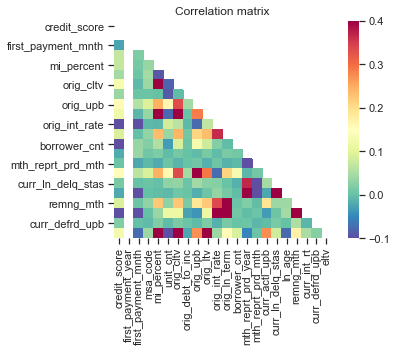

In [15]:
corrs = data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.1, vmax=.4)
plt.title('Correlation matrix')

In [17]:
data.rcorr(stars=False)

,credit_score,first_payment_year,first_payment_mnth,msa_code,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,...,borrower_cnt,mth_reprt_prd_year,mth_reprt_prd_mth,curr_actl_upb,curr_ln_delq_stas,ln_age,remng_mth,curr_int_rt,curr_defrd_upb,eltv
credit_score,-,nan,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.071,0.691,0.000,0.138,0.029,0.000,0.000,0.051,0.000
first_payment_year,nan,-,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
first_payment_mnth,-0.024,nan,-,0.070,0.184,0.570,0.487,0.591,0.000,0.370,...,0.000,0.000,0.018,0.000,0.916,0.000,0.496,0.000,0.960,0.000
msa_code,0.071,nan,0.019,-,0.001,0.000,0.000,0.614,0.000,0.001,...,0.036,0.460,0.517,0.000,0.618,0.883,0.002,0.95,0.569,0.075
mi_percent,0.07,nan,0.013,0.035,-,0.000,0.,0.993,0.000,0.,...,0.000,0.08,0.047,0.000,0.828,0.801,0.000,0.000,0.051,0.000
unit_cnt,0.046,nan,0.006,0.045,-0.091,-,0.000,0.000,0.000,0.000,...,0.001,0.533,0.469,0.000,0.003,0.476,0.003,0.000,0.644,0.000
orig_cltv,0.129,nan,-0.007,0.039,0.725,-0.081,-,0.737,0.000,0.,...,0.000,0.22,0.246,0.000,0.001,0.404,0.000,0.000,0.101,0.
orig_debt_to_inc,0.038,nan,0.005,0.005,0.0,-0.089,-0.003,-,0.000,0.736,...,0.566,0.973,0.841,0.000,0.678,0.759,0.113,0.007,0.713,0.257
orig_upb,0.159,nan,0.059,0.092,0.246,0.162,0.335,0.046,-,0.000,...,0.000,0.628,0.423,0.,0.000,0.098,0.000,0.000,0.595,0.000
orig_ltv,0.12,nan,-0.009,0.036,0.75,-0.076,0.976,0.003,0.288,-,...,0.000,0.175,0.135,0.000,0.011,0.493,0.000,0.000,0.079,0.


In [19]:
fig = px.line(data, x='mth_reprt_prd_year', y='curr_ln_delq_stas')
fig.show()

In [22]:
fig = px.line(data, x='first_payment_mnth', y='curr_ln_delq_stas')
fig.show()